In [2]:
import numpy as np
import pandas as pd

df = pd.read_csv('Crop_recommendation.csv')
df.head(10)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
5,69,37,42,23.058049,83.370118,7.073454,251.055000,rice
6,69,55,38,22.708838,82.639414,5.700806,271.324860,rice
7,94,53,40,20.277744,82.894086,5.718627,241.974195,rice
8,89,54,38,24.515881,83.535216,6.685346,230.446236,rice
9,68,58,38,23.223974,83.033227,6.336254,221.209196,rice


In [3]:
len(df['label'].unique())

22

In [4]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [5]:
df[df['N']==0]

,N,P,K,temperature,humidity,ph,rainfall,label
346,0,65,15,23.461683,23.221976,5.645436,95.842534,kidneybeans
382,0,55,22,22.986669,20.579406,5.916779,143.858494,kidneybeans
477,0,70,21,36.300497,56.030213,4.672437,101.607399,pigeonpeas
517,0,55,25,28.174894,43.667230,4.524172,45.781728,mothbeans
608,0,49,18,29.683617,87.935981,6.990095,41.824902,mungbean
829,0,65,24,28.495844,62.446162,7.841496,53.145310,lentil
875,0,69,21,25.869282,61.883211,7.072923,36.682840,lentil
878,0,74,17,23.333759,64.505158,7.240988,47.015107,lentil
891,0,67,22,29.821121,69.407321,6.593798,51.564611,lentil
904,0,27,38,22.445813,89.901470,6.738016,109.390600,pomegranate


In [6]:
df.drop(df[df['N']==0].index,inplace=True)

<AxesSubplot:>

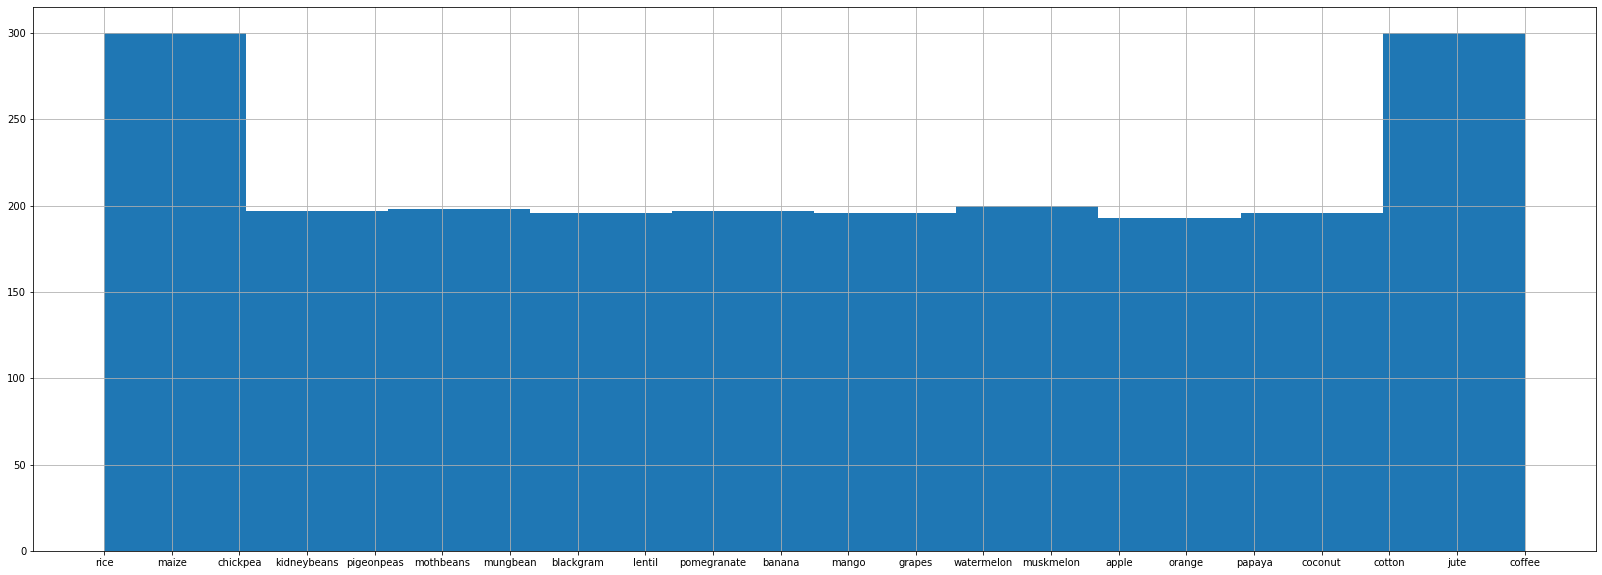

In [7]:
df['label'].hist(
    figsize=(28,10)
)

In [8]:
df[df['label']=='mango'].describe()

,N,P,K,temperature,humidity,ph,rainfall
count,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000
mean,20.690722,27.257732,29.938144,31.086319,50.125438,5.761101,94.681191
std,11.990761,7.633913,3.111854,2.596207,2.756055,0.706143,3.361494
min,1.000000,15.000000,25.000000,27.003155,45.022364,4.507524,89.291476
25%,11.000000,20.000000,27.000000,28.894094,47.908591,5.191265,91.558458
50%,21.000000,28.000000,30.000000,31.204782,50.222876,5.731719,94.763230
75%,31.000000,35.000000,32.000000,32.893002,52.481006,6.414527,97.461192
max,40.000000,40.000000,35.000000,35.990097,54.964053,6.967418,100.812466


In [9]:
from sklearn.model_selection import train_test_split

x = df.loc[:,['N','P','K','temperature','humidity','ph','rainfall']]
y = df.loc[:,['label']]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [10]:
df.describe()
df['label'].describe()

count     2173
unique      22
top       rice
freq       100
Name: label, dtype: object

In [11]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, 
                                max_depth=3,
                                max_features='auto', 
                                min_samples_leaf=4,
                                bootstrap=True, 
                                n_jobs=-1, 
                                random_state=0)
model.fit(X_train, y_train)

C:\Users\bathi\AppData\Local\Temp\ipykernel_32464\1885774670.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)
C:\Users\bathi\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_depth=3, max_features='auto', min_samples_leaf=4,
                       n_jobs=-1, random_state=0)

In [12]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)

accuracy_score(y_test, y_pred)

0.8802228412256268

In [13]:
# X_test.head()
y_test[y_test['label']=='mothbeans'].count()

label    37
dtype: int64

In [14]:
model.predict([[100,100,100,100,100,6,100],[80,50,40,20,87,6,200]])

C:\Users\bathi\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array(['banana', 'rice'], dtype=object)

In [15]:
import pickle

with open('model.pkl','wb') as f:
    pickle.dump(model,f)

In [16]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print('Classification Report:\n\n',classification_report(y_test,y_pred),'\n')
print('accuracy score is:',accuracy_score(y_test, y_pred))

Classification Report:

               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        29
      banana       1.00      1.00      1.00        31
   blackgram       0.48      1.00      0.64        29
    chickpea       1.00      1.00      1.00        40
     coconut       1.00      1.00      1.00        38
      coffee       0.97      1.00      0.98        31
      cotton       1.00      1.00      1.00        36
      grapes       1.00      1.00      1.00        33
        jute       1.00      0.10      0.18        30
 kidneybeans       1.00      1.00      1.00        39
      lentil       0.57      1.00      0.72        30
       maize       1.00      1.00      1.00        30
       mango       0.86      1.00      0.92        24
   mothbeans       1.00      0.05      0.10        37
    mungbean       1.00      1.00      1.00        34
   muskmelon       1.00      1.00      1.00        32
      orange       1.00      1.00      1.00        34
  